In [ ]:
import pandas as pd
data = pd.read_csv('Boston.csv') #読み込むcsvファイルを選択

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
column_list = data.columns.to_list()
column_list

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [7]:


# 指定した変数が1番上になるように調整
target = 'tax' # 一番上に表示したい変数名を入力
column_list = data.columns.to_list()
column_list.remove(target)
column_list.insert(0, target)

column_list

['tax',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'ptratio',
 'black',
 'lstat',
 'medv']

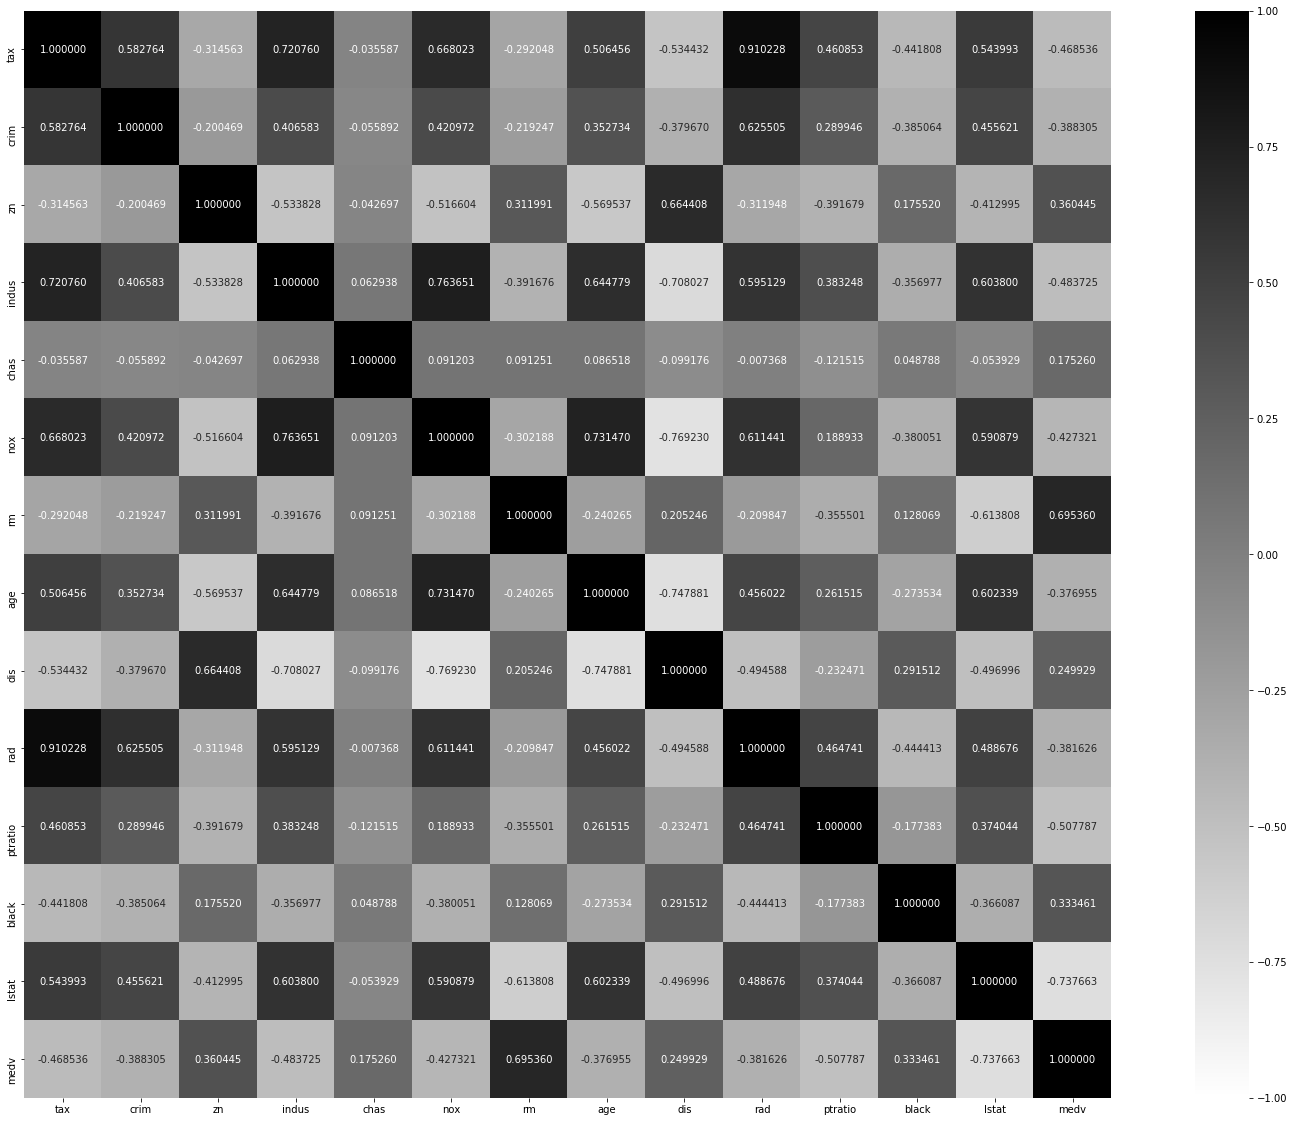

In [9]:
#相関行列の可視化
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(data[column_list].corr(), square=True,
            vmax=1,
            vmin=-1,
            center=0,
            cmap='binary',
            annot=True,
            fmt='2f')

In [ ]:



#plt.savefig('corr_heatmap.png') #画像保存
# data[column_list].corr().to_csv("ファイル名.csv") #csvファイル保存

# 第2案

In [22]:
def calc_corr(df):
    # 相関係数行列を作成
    corr_mat = df.corr(method='pearson')

    # 行（列）サイズを取得
    n = corr_mat.shape[0]

    # 項目名を取得
    columns = corr_mat.columns.tolist()

    # 変数名1, 変数名2, 値を一つの配列に入れたものを作成
    # 相関係数行列の下三角部分（対角成分除く）だけ
    corr_ary = []
    var1_ary = []
    var2_ary = []
    for i in range(n):
        for j in range(i):
            if i == j:
                continue
            corr_ary.append(corr_mat.iloc[i,j])
            var1_ary.append(columns[i])
            var2_ary.append(columns[j])

    # dfにする
    df_new = pd.DataFrame([])
    df_new["説明変数その1"] = var1_ary
    df_new["説明変数その2"] = var2_ary
    df_new["相関係数"] = corr_ary

    return df_new

In [23]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
#corr(df)
#df.corr(method='pearson')
new_df = calc_corr(data)

#'corr'カラムを降順にソートすることで、相関の高い組み合わせを先頭に表示しました。
#昇順にしたい場合は、ascending=True にしてください。

sort_new_df = new_df.sort_values(by='相関係数', ascending=False)
sort_new_df

,説明変数その1,説明変数その2,相関係数
44,tax,rad,0.910228
8,nox,indus,0.763651
19,age,nox,0.731470
38,tax,indus,0.720760
83,medv,rm,0.695360
...,...,...,...
71,lstat,rm,-0.613808
23,dis,indus,-0.708027
90,medv,lstat,-0.737663
27,dis,age,-0.747881
